## Libraries

In [1]:
from enum import Enum
import copy
import random
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline 

from environment import *
from mc import *
from td import *
from linearApprox import *

random.seed(1)

## Monte-Carlo Control in Easy21

Apply Monte-Carlo control to Easy21. Initialise the value function to zero. Use a time-varying scalar step-size of αt = 1/N(st,at) and an ε-greedy exploration strategy with εt = N0/(N0 + N(st)), where N0 = 100 is a constant, N(s) is the number of times that state s has been visited, and N(s,a) is the number of times that action a has been selected from state s. Feel free to choose an alternative value for N0, if it helps producing better results. Plot the optimal value function V ∗ (s) = maxa Q∗ (s, a) using similar axes to the following figure taken from Sutton and Barto’s Blackjack example.

In [2]:
mc_agent = MC_Agent(Environment(), 100)
mc_agent.train(100)

100%|██████████| 100/100 [00:00<00:00, 18740.47it/s]


AttributeError: 'MC_Agent' object has no attribute 'get_optimal_action'

In [9]:
def animate(frame):
    i = agent.iterations
    step_size = i
    step_size = max(1, step_size)
    step_size = min(step_size, 2 ** 16)
    agent.train(step_size, disable_logging=True)

    ax.clear()
    surf =  agent.plot_frame(ax)
    plt.title('MC score:%s frame:%s step_size:%s ' % (float(agent.count_wins)/agent.iterations*100, frame, step_size) )
    # plt.draw()
    fig.canvas.draw()
    return surf

MovieWriter imagemagick unavailable; using Pillow instead.
100%|██████████| 1/1 [00:00<00:00, 496.54it/s]


100.0


100%|██████████| 1/1 [00:00<00:00, 3634.58it/s]


50.0


100%|██████████| 2/2 [00:00<00:00, 8933.55it/s]


50.0


100%|██████████| 4/4 [00:00<00:00, 11626.62it/s]


37.5


100%|██████████| 8/8 [00:00<00:00, 19949.13it/s]


37.5


100%|██████████| 16/16 [00:00<00:00, 11913.52it/s]


43.75


100%|██████████| 32/32 [00:00<00:00, 13145.71it/s]


51.5625


100%|██████████| 64/64 [00:00<00:00, 12048.27it/s]


42.96875


100%|██████████| 128/128 [00:00<00:00, 22133.53it/s]


45.3125


100%|██████████| 256/256 [00:00<00:00, 16068.21it/s]


44.3359375


100%|██████████| 512/512 [00:00<00:00, 15884.81it/s]


45.01953125


100%|██████████| 1024/1024 [00:00<00:00, 7391.37it/s]


46.630859375


100%|██████████| 2048/2048 [00:00<00:00, 11690.84it/s]


47.4853515625


100%|██████████| 4096/4096 [00:00<00:00, 10180.11it/s]


47.6318359375


100%|██████████| 8192/8192 [00:00<00:00, 18316.90it/s]


48.114013671875


100%|██████████| 16384/16384 [00:01<00:00, 16222.86it/s]


49.4293212890625


100%|██████████| 32768/32768 [00:01<00:00, 19724.86it/s]


50.32501220703125


100%|██████████| 65536/65536 [00:03<00:00, 19860.06it/s]


51.13372802734375


100%|██████████| 65536/65536 [00:03<00:00, 17079.89it/s]


51.467386881510414


100%|██████████| 65536/65536 [00:04<00:00, 16135.78it/s]


51.6754150390625


100%|██████████| 65536/65536 [00:04<00:00, 15446.09it/s]


51.77032470703124


100%|██████████| 65536/65536 [00:03<00:00, 17416.55it/s]


51.82011922200521


100%|██████████| 65536/65536 [00:03<00:00, 16746.71it/s]


51.91105433872768


100%|██████████| 65536/65536 [00:03<00:00, 16928.48it/s]


51.975059509277344


100%|██████████| 65536/65536 [00:03<00:00, 17063.20it/s]


51.985677083333336


100%|██████████| 65536/65536 [00:04<00:00, 13458.05it/s]


52.01461791992188


100%|██████████| 65536/65536 [00:03<00:00, 16595.65it/s]


52.03455144708807


100%|██████████| 65536/65536 [00:04<00:00, 14986.49it/s]


52.065277099609375


100%|██████████| 65536/65536 [00:03<00:00, 19579.96it/s]


52.08658071664664


100%|██████████| 65536/65536 [00:03<00:00, 19365.84it/s]


52.125440325055806


100%|██████████| 65536/65536 [00:03<00:00, 19481.85it/s]


52.144775390625


100%|██████████| 65536/65536 [00:03<00:00, 20178.20it/s]


52.1510124206543


100%|██████████| 65536/65536 [00:03<00:00, 20138.49it/s]


52.15552834903493


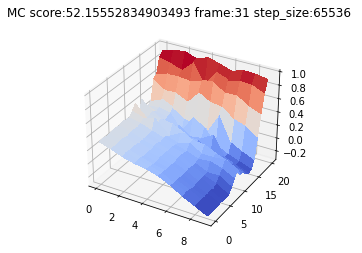

In [3]:
N0 = 100
agent = MC_Agent(Environment(), N0)
fig = plt.figure("N100")
ax = fig.add_subplot(111, projection='3d')

ani = animation.FuncAnimation(fig, animate, 32, repeat=False)

# note: requires gif writer; swap with plt.show()
ani.save('MC_Agent.gif', writer='imagemagick', fps=3)
# plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


0.0
0.0
50.0
62.5
62.5
50.0
53.125
46.875
46.875
50.78125
52.34375
52.1484375
51.3916015625
51.3916015625
51.64794921875
52.008056640625
51.86309814453125
51.97296142578125
51.993306477864586
51.938629150390625
51.99798583984375
51.9744873046875
51.91083635602679
51.9256591796875
51.88666449652778
51.86050415039063
51.85657848011363
51.845296223958336
51.862746018629814
51.836395263671875
51.83593749999999
51.82046890258789
51.82629753561581


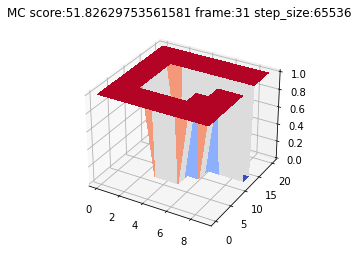

In [10]:
N0 = 100
agent = Linear_Approximation_Agent(Environment(), N0,1,1)
fig = plt.figure("N100")
ax = fig.add_subplot(111, projection='3d')

ani = animation.FuncAnimation(fig, animate, 32, repeat=False)

# note: requires gif writer; swap with plt.show()
ani.save('MC_Agent.gif', writer='imagemagick', fps=3)
# plt.show()

## TD Learning in Easy21

Run the algorithm with parameter values λ ∈ {0, 0.1, 0.2, ..., 1}. Stop each run after 1000 episodes
2
 
and report the mean-squared error Sums,a(Q(s, a) − Q∗(s, a))2 over all states s and actions a, comparing the true values Q∗(s,a) computed in the previous section with the estimated values Q(s, a) computed by Sarsa.

Plot the mean- squared error against λ.

In [ ]:
mc_agent = MC_Agent(Environment(), 100)
mc_agent.train(1000000)

N0 = 100
lambda_list = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
mse_list = []
n_elements = mc_agent.Q.shape[0]*mc_agent.Q.shape[1]*2
for mlambda in lambda_list:
    agent = TD_Agent(Environment(), N0, mlambda, 1)

    agent.train(1000,disable_logging = True)
    mse = np.sum(np.square(agent.Q-mc_agent.Q))/float(n_elements)
    mse_list.append(mse)

fig = plt.figure("N100")
surf = plt.plot(lambda_list[0:11], mse_list[0:11])

plt.show()

For λ = 0 and λ = 1 only, plot the learning curve of mean-squared error against episode number.

In [ ]:
N0 = 100
mlambda = 0.0
mse_list = []
episode_number = range(1000)
n_elements = len(mc_agent.Q)
agent = TD_Agent(Environment(), N0, mlambda, gamma=1)
for i in episode_number:
    agent.train(1,disable_logging = True)
    mse = np.sum(np.square(agent.Q-mc_agent.Q))/float(1000)
    mse_list.append(mse)

fig = plt.figure("0.0")
surf = plt.plot( episode_number,mse_list)
plt.show()

In [ ]:
N0 = 100
mlambda = 1.0
mse_list = []
episode_number = range(1000)
n_elements = len(mc_agent.Q)
agent = TD_Agent(Environment(), N0, mlambda, gamma=1)
for i in episode_number:
    agent.train(1,disable_logging = True)
    mse = np.sum(np.square(agent.Q-mc_agent.Q))/float(1000)
    mse_list.append(mse)

fig = plt.figure("1.0")
surf = plt.plot( episode_number,mse_list)
plt.show()

## Linear Function Approximation in Easy21

We now consider a simple value function approximator using coarse coding. Use a binary feature vector φ(s, a) with 3 ∗ 6 ∗ 2 = 36 features. Each binary feature has a value of 1 iff (s, a) lies within the cuboid of state-space corresponding to that feature, and the action corresponding to that feature. The cuboids have the following overlapping intervals:
dealer(s) = {[1, 4], [4, 7], [7, 10]}
player(s) = {[1, 6], [4, 9], [7, 12], [10, 15], [13, 18], [16, 21]}
a = {hit, stick}
where
• dealer(s) is the value of the dealer’s first card (1–10) • sum(s) is the sum of the player’s cards (1–21)
Repeat the Sarsa(λ) experiment from the previous section, but using linear value function approximation Q(s, a) = φ(s, a)⊤θ. Use a constant exploration of ε = 0.05 and a constant step-size of 0.01. Plot the mean-squared error against λ. For λ = 0 and λ = 1 only, plot the learning curve of mean-squared error against episode number.

In [ ]:
N0 = 100
mlambda = 0.0
mse_list = []
episode_number = range(1000)
n_elements = len(mc_agent.Q)
agent = Linear_Approximation_Agent(Environment(), N0, mlambda, gamma=1)
for i in episode_number:
    agent.train(1,disable_logging = True)
    mse = np.sum(np.square(agent.Q-mc_agent.Q))/float(1000)
    mse_list.append(mse)

fig = plt.figure("0.0")
surf = plt.plot( episode_number,mse_list)
plt.show()

In [ ]:
N0 = 100
mlambda = 1.0
mse_list = []
episode_number = range(1000)
n_elements = len(mc_agent.Q)
agent = Linear_Approximation_Agent(Environment(), N0, mlambda, gamma=1)
for i in episode_number:
    agent.train(1,disable_logging = True)
    mse = np.sum(np.square(agent.Q-mc_agent.Q))/float(1000)
    mse_list.append(mse)

fig = plt.figure("1.0")
surf = plt.plot( episode_number,mse_list)
plt.show()